In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import statistics as stat
import seaborn as sns
import thejoker as tj
import pandas as pd
import numpy as np
import arviz as az
import pymc as pm
import corner
import math 
import h5py


from astropy.visualization.units import quantity_support
from sklearn.metrics import mean_squared_error
from thejoker import JokerPrior, TheJoker, RVData
from thejoker.plot import plot_rv_curves
from os.path import join
from tqdm import tqdm

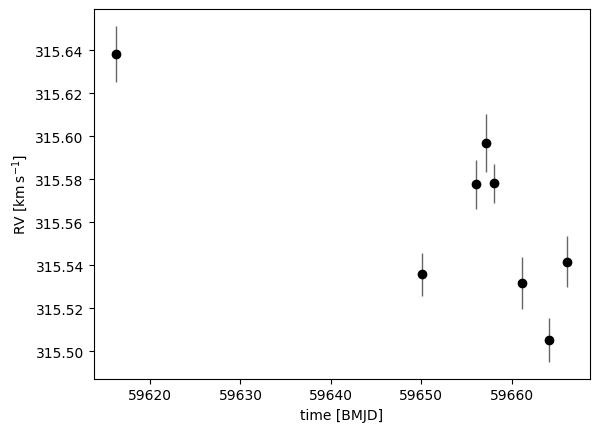

In [2]:
t = [59616.23644604064, 59650.10541174411, 59656.05310538688, 59657.12322433722, 59658.06083902933, 59661.1028844865, 59664.12167293875, 59666.11853265618]
rv = [315.6384, 315.5357, 315.5778, 315.5968, 315.5781, 315.5318, 315.5052, 315.5417] * u.km/u.s
err = [0.013, 0.0098, 0.0114, 0.0136, 0.0091, 0.012, 0.0102, 0.0118] * u.km/u.s
data = tj.RVData(t=t, rv=rv, rv_err=err)
ax = data.plot() 

In [3]:
samples1 = tj.JokerSamples.read("samples1.hdf5")
samples2 = tj.JokerSamples.read("samples2.hdf5")
samples3 = tj.JokerSamples.read("samples3.hdf5")
samples4 = tj.JokerSamples.read("samples4.hdf5")
samples5 = tj.JokerSamples.read("samples5.hdf5")
samples6 = tj.JokerSamples.read("samples6.hdf5")
samples7 = tj.JokerSamples.read("samples7.hdf5")

all_samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]

num_samples = 0
for i in all_samples:
    num_samples = num_samples + len(i)
num_samples

262

(315.35, 315.8)

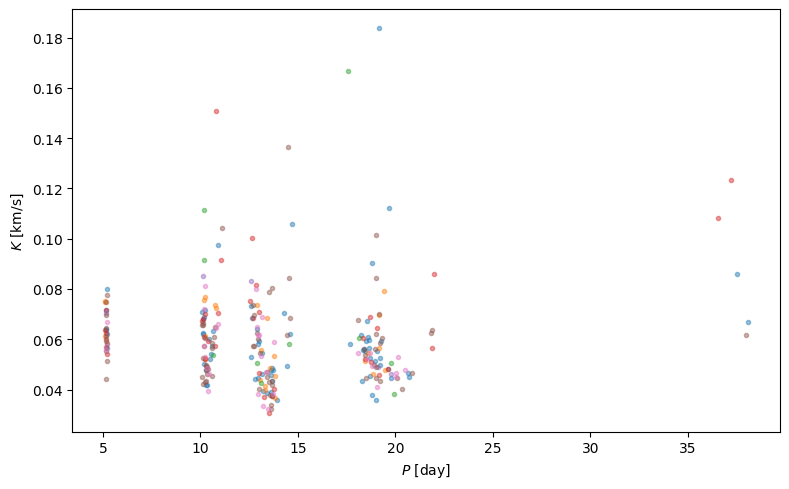

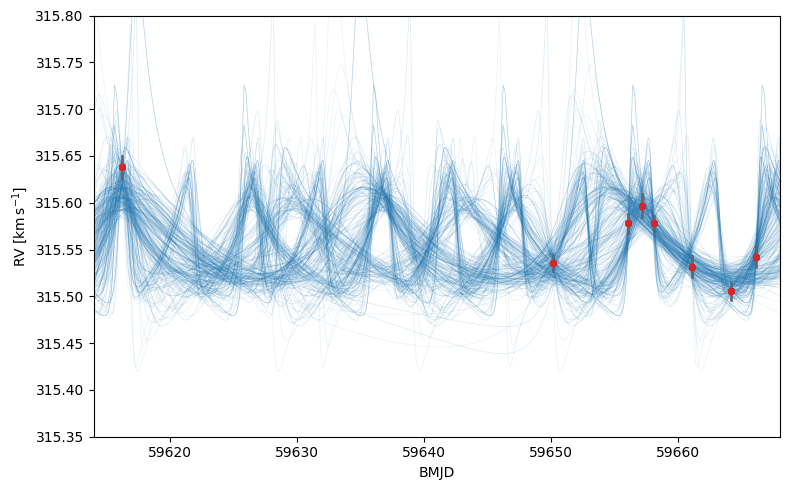

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")

for i in all_samples:
    ax.scatter(i['P'].value, i['K'].to(u.km/u.s).value,marker='.', alpha=0.45)
ax.set_xlabel("$P$ [day]")
ax.set_ylabel("$K$ [km/s]")
#ax.set_xlim(0, 256)
#ax.set_ylim(0.75, 3.)

#ax.scatter(61.942, 1.3959, marker='o', color='#31a354', zorder=-100)

fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
t_grid = np.linspace(59614, 59668, 1024)
#t_grid = np.linspace(59648, 59668, 1024)

for i in all_samples:
    _ = tj.plot_rv_curves(i,data=data,plot_kwargs=dict(color="tab:blue"),data_plot_kwargs=dict(color="tab:red"),relative_to_t_ref=False,ax=ax)

ax.set_xlim(59614, 59668)
#ax.set_xlim(59648, 59668)
ax.set_ylim(315.35,315.8)

In [5]:
all_df = pd.DataFrame()
columns = ["P", "e", "omega", "M0", "s", "K", "v0"]
dfs = ["df1","df2","df3","df4","df5","df6","df7"]

for i,k in zip(all_samples, dfs):
    globals()[k] = pd.DataFrame()
    for j in columns:
        globals()[k][j] = i[j].value

all_df = pd.concat([globals()["df1"],globals()["df2"],globals()["df3"],globals()["df4"],globals()["df5"],globals()["df6"],globals()["df7"]])


In [6]:
all_df

,P,e,omega,M0,s,K,v0
0,19.654545,0.586521,5.999465,-0.838474,0.0,0.112343,315.571604
1,13.907265,0.389913,0.787477,0.301521,0.0,0.035788,315.554825
2,17.677213,0.312215,5.155558,-0.190987,0.0,0.058195,315.562226
3,10.204040,0.503835,-0.537172,-0.245593,0.0,0.050214,315.545578
4,5.190823,0.568435,0.865097,0.164344,0.0,0.056318,315.549433
...,...,...,...,...,...,...,...
27,18.714122,0.394824,-0.916744,-0.492843,0.0,0.054659,315.564400
28,12.969778,0.288791,-1.776021,-0.894549,0.0,0.038402,315.557489
29,5.193370,0.492201,1.077068,0.228192,0.0,0.066925,315.550515
30,19.048423,0.083597,0.433365,0.709849,0.0,0.041018,315.551093


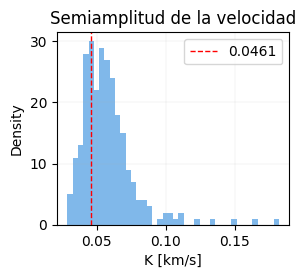

El pico más alto está en el valor: 0.046141124545823885


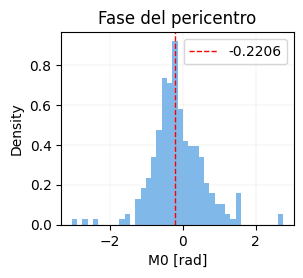

El pico más alto está en el valor: -0.22058344189527768


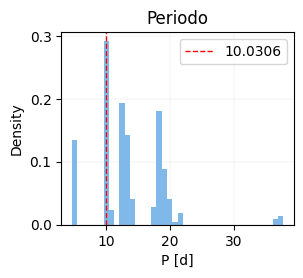

El pico más alto está en el valor: 10.03059286004703


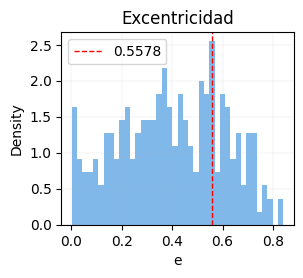

El pico más alto está en el valor: 0.5577797199745452


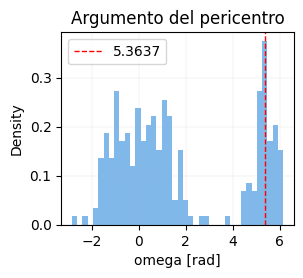

El pico más alto está en el valor: 5.363725991916011


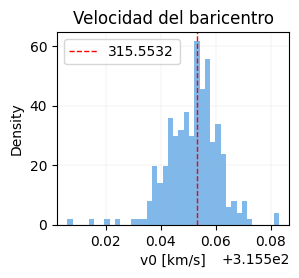

El pico más alto está en el valor: 315.55319454397426


In [7]:
variables = ["K","M0","P","e","omega","v0"]
xlabel = ["K [km/s]","M0 [rad]","P [d]","e","omega [rad]","v0 [km/s]"]
title = ["Semiamplitud de la velocidad","Fase del pericentro","Periodo","Excentricidad","Argumento del pericentro","Velocidad del baricentro"]
picos = []

for i in range(len(variables)):
    plt.figure(figsize=(3,2.5))
    plt.ylabel("Density")
    plt.xlabel(xlabel[i])
    plt.title(title[i])
    conteos, bins, _  =  plt.hist(all_df[variables[i]], bins = 40 ,density = True ,alpha=0.7, align = 'left', color = '#4B9BE2')
    
    plt.grid(linestyle='-', linewidth=0.1)
    
    # Encontrar el índice del valor máximo en los conteos
    indice_maximo = np.argmax(conteos)
    
    # Obtener el valor del pico más alto
    pico_mas_alto = bins[indice_maximo]
    picos.append(bins[indice_maximo])
    # Agregar una línea vertical en el pico más alto
    plt.axvline(x=pico_mas_alto, color='red', linestyle='--', linewidth = 1, label = f"{round(pico_mas_alto,4)}")
    
    
    # Mostrar el histograma con el pico más alto resaltado
    plt.legend()
    plt.show()
    
    print("El pico más alto está en el valor:", pico_mas_alto)


In [8]:
picos

[0.046141124545823885,
 -0.22058344189527768,
 10.03059286004703,
 0.5577797199745452,
 5.363725991916011,
 315.55319454397426]

Text(0.5, 1.02, 'PairGrid of all dataset')

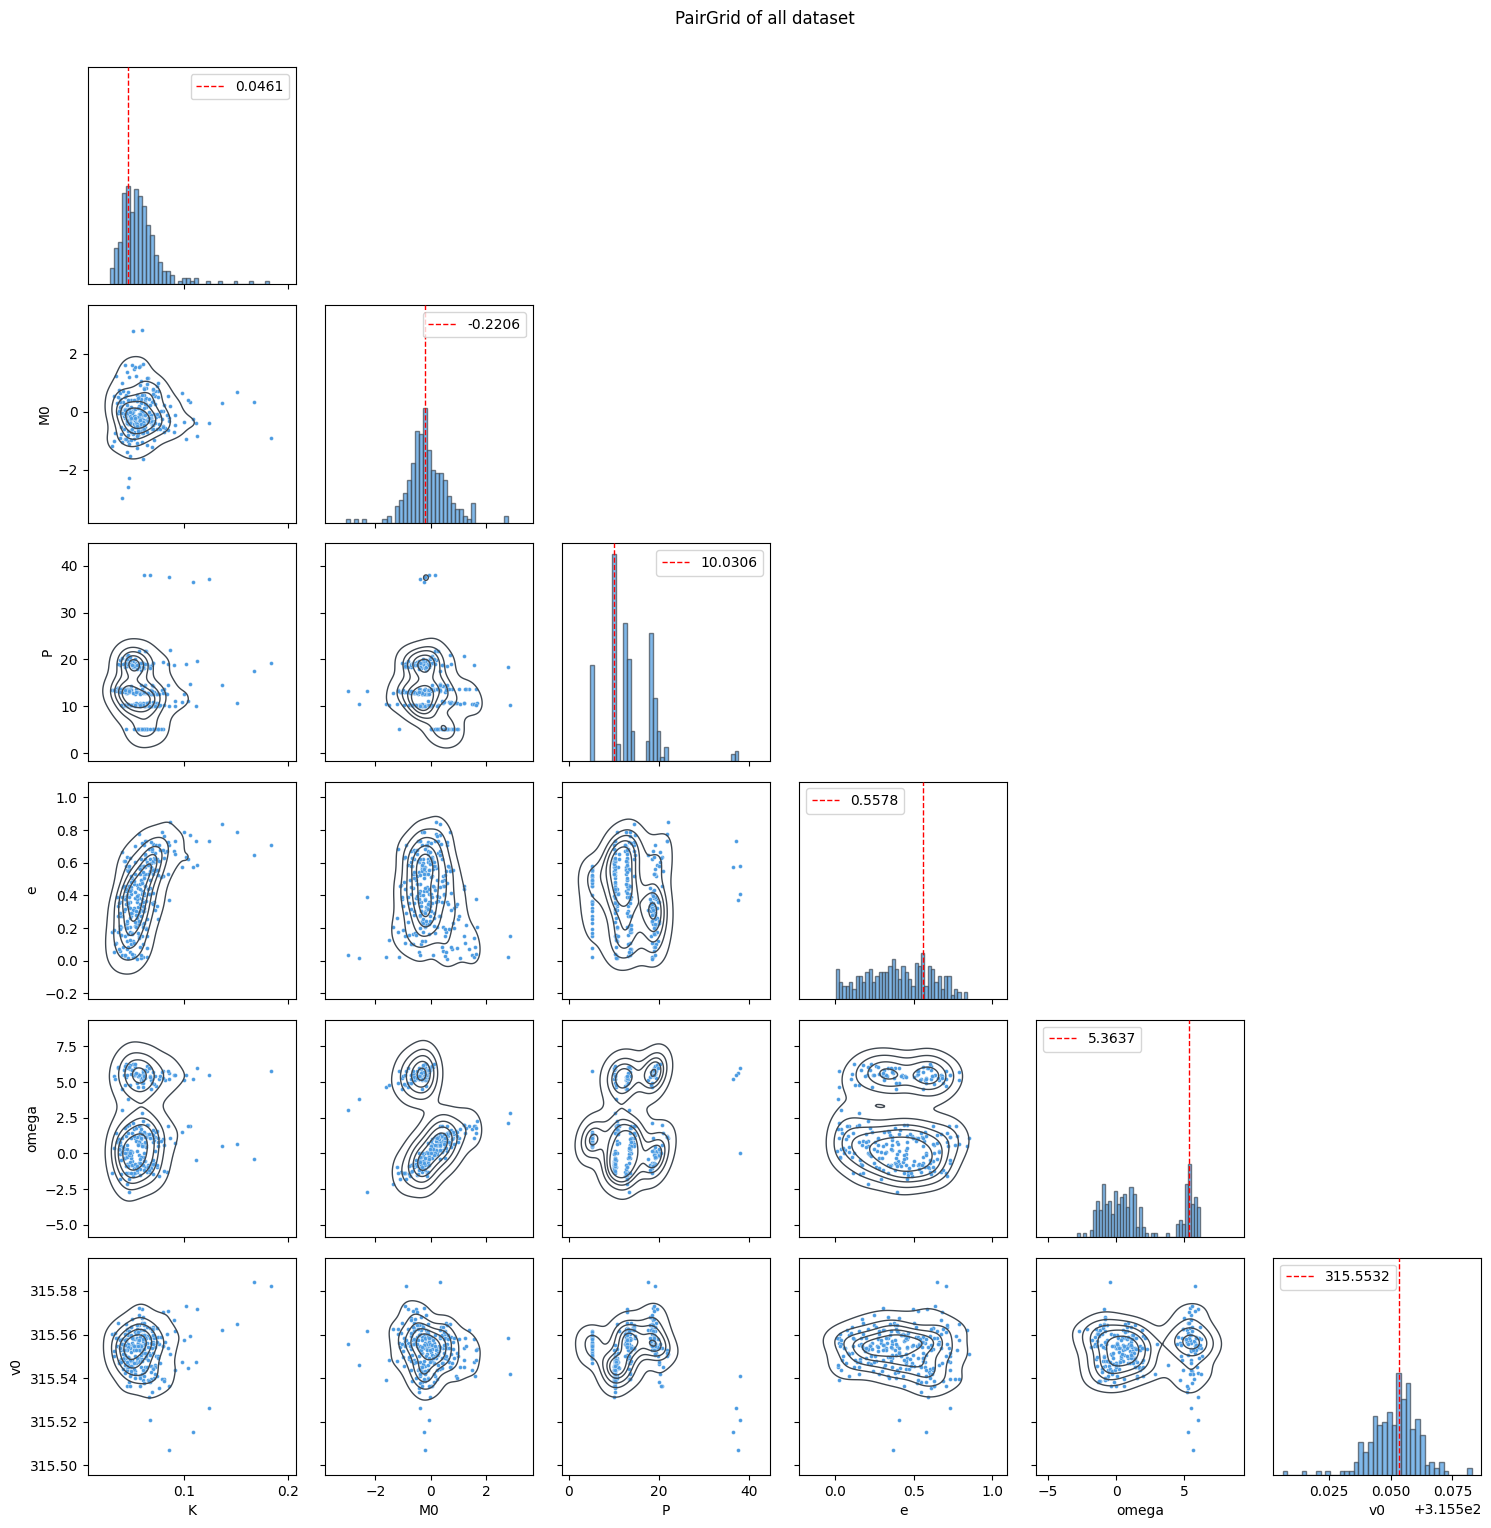

In [9]:
# Crear un gráfico de correlación utilizando pairplot
g = sns.PairGrid(all_df, 
            x_vars=["K", "M0", "P", "e", "omega", "v0"],
            y_vars=["K", "M0", "P", "e", "omega", "v0"],
            #plot_kws=dict(marker=".", linewidth=1),        # Edito los scatter
            #diag_kws=dict(fill=False),                     # Edito los histogramas
            corner=True)                                   # No muestra las de encima de la diagonal
# Mostrar el gráfico

g.map_diag(plt.hist,  bins = 40 ,density = False ,alpha=0.7, align = 'left', color = '#4B9BE2',edgecolor = '#3F4750')             #Histogramas en la diagonal
g.map_lower(sns.kdeplot,linewidths = 1, levels=6,  color="#3F4750",thresh=.1)             # Muestra los contornos
g.map_lower(sns.scatterplot,s = 8, color="#4B9BE2")                     # Muestra los puntos

# Añadir bordes y rejillas a cada cuadrícula
for ax in g.axes.flatten():
    if ax is not None:
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.grid(False)
        
# Agregar líneas verticales personalizadas en las diagonales
for i in range(len(g.diag_axes)):
    ax = g.diag_axes[i]
    ax.axvline(x=picos[i], color='red', linestyle='--',linewidth = 1, label = f"{round(picos[i],4)}")
    ax.legend()
# Título del PairGrid
g.fig.suptitle("PairGrid of all dataset", y=1.02)

In [10]:
all_df

,P,e,omega,M0,s,K,v0
0,19.654545,0.586521,5.999465,-0.838474,0.0,0.112343,315.571604
1,13.907265,0.389913,0.787477,0.301521,0.0,0.035788,315.554825
2,17.677213,0.312215,5.155558,-0.190987,0.0,0.058195,315.562226
3,10.204040,0.503835,-0.537172,-0.245593,0.0,0.050214,315.545578
4,5.190823,0.568435,0.865097,0.164344,0.0,0.056318,315.549433
...,...,...,...,...,...,...,...
27,18.714122,0.394824,-0.916744,-0.492843,0.0,0.054659,315.564400
28,12.969778,0.288791,-1.776021,-0.894549,0.0,0.038402,315.557489
29,5.193370,0.492201,1.077068,0.228192,0.0,0.066925,315.550515
30,19.048423,0.083597,0.433365,0.709849,0.0,0.041018,315.551093


(315.35, 315.8)

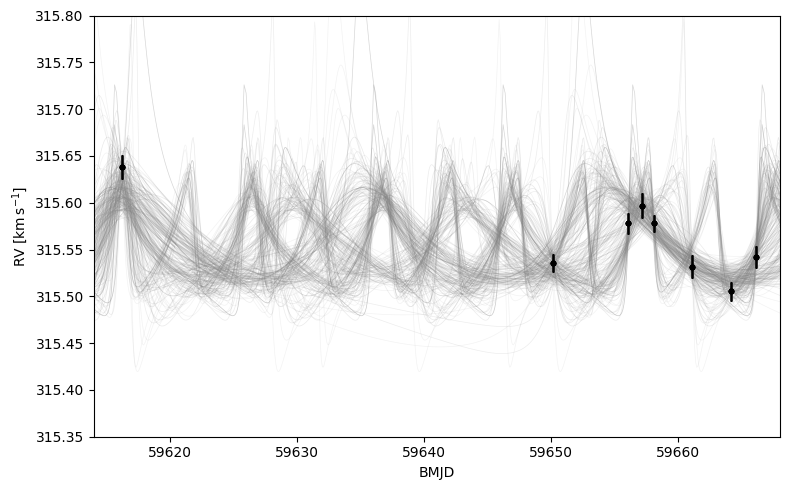

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
t_grid = np.linspace(59614, 59668, 1024)
#t_grid = np.linspace(59648, 59668, 1024)

for i in all_samples:
    _ = tj.plot_rv_curves(i,data=data,relative_to_t_ref=False,ax=ax,
                plot_kwargs={'color': '#888888', 'zorder': -100, 'marker': ''},
               data_plot_kwargs={'ecolor': 'k', 'markersize': 3, 'elinewidth': 1, 'alpha': 1., 'zorder': 100})

ax.set_xlim(59614, 59668)
#ax.set_xlim(59648, 59668)
ax.set_ylim(315.35,315.8)

In [12]:
P_5 = {}
P_10 = {}
P_13 = {}
P_20 = {}

for i in range(len(all_samples)):
    P_5[i] = all_samples[i][all_samples[i]["P"].value < 8]

    P_10[i] = all_samples[i][all_samples[i]["P"].value > 8]
    P_10[i] = P_10[i][P_10[i]["P"].value < 10.35]
    
    P_13[i] = all_samples[i][all_samples[i]["P"].value > 12]
    P_13[i] = P_13[i][P_13[i]["P"].value < 16]
    
    P_20[i] = all_samples[i][all_samples[i]["P"].value > 16]
    P_20[i] = P_20[i][P_20[i]["P"].value < 25]

Text(0, 0.5, '$K$ [km/s]')

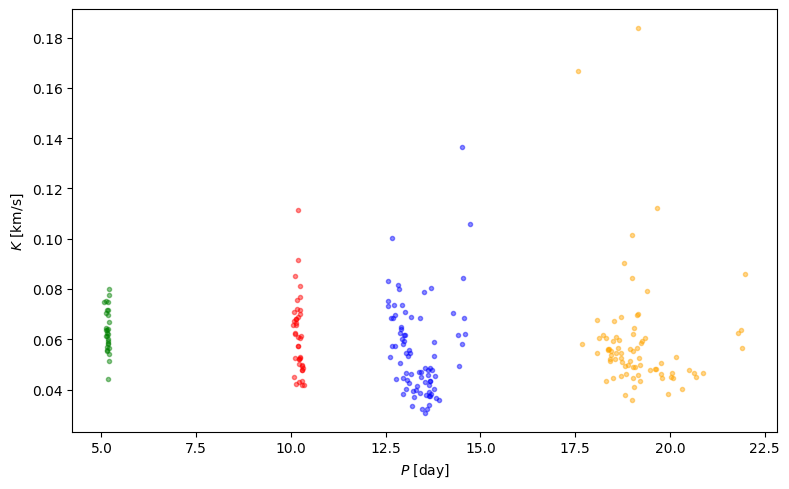

In [13]:
colores = ["green","red","blue","orange"]
P_dif = [P_5,P_10,P_13,P_20]

fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")

for k in range(len(all_samples)):
    for i ,j in zip(P_dif,range(4)):
        ax.scatter(i[k]['P'].value, i[k]['K'].to(u.km/u.s).value,marker='.', color = colores[j], alpha=0.45)

#ax.set_xlim(9.5,12)
ax.set_xlabel("$P$ [day]")
ax.set_ylabel("$K$ [km/s]")

In [14]:
P_5.pop(2)

<JokerSamples [P, e, omega, M0, s, K, v0] (0 samples)>

In [15]:
P_5

{0: <JokerSamples [P, e, omega, M0, s, K, v0] (6 samples)>,
 1: <JokerSamples [P, e, omega, M0, s, K, v0] (4 samples)>,
 3: <JokerSamples [P, e, omega, M0, s, K, v0] (6 samples)>,
 4: <JokerSamples [P, e, omega, M0, s, K, v0] (2 samples)>,
 5: <JokerSamples [P, e, omega, M0, s, K, v0] (9 samples)>,
 6: <JokerSamples [P, e, omega, M0, s, K, v0] (2 samples)>}

(315.35, 315.9)

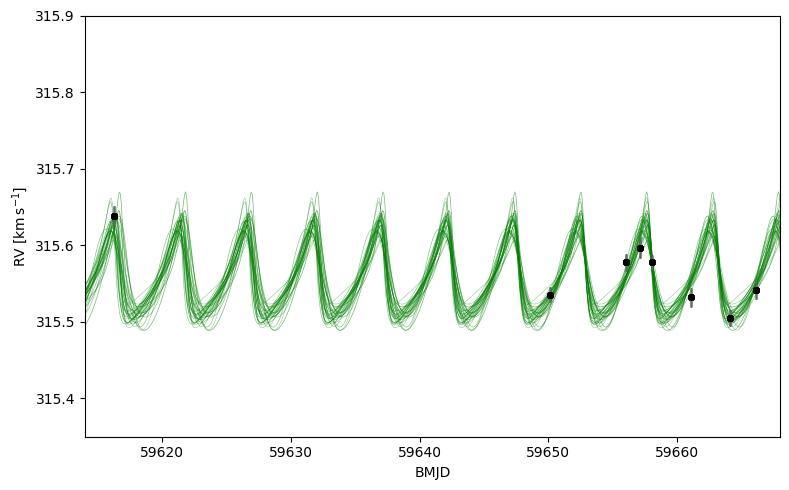

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
t_grid = np.linspace(59614, 59668, 1024)
#t_grid = np.linspace(59648, 59668, 1024)
for i in [0,1,3,4,5,6]:
    _ = tj.plot_rv_curves(P_5[i],data=data,plot_kwargs=dict(color=colores[0]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax)
    
ax.set_xlim(59614, 59668)
ax.set_ylim(315.35,315.9)

In [34]:
P_5[0][0]

<JokerSamples [P, e, omega, M0, s, K, v0] (1 samples)>

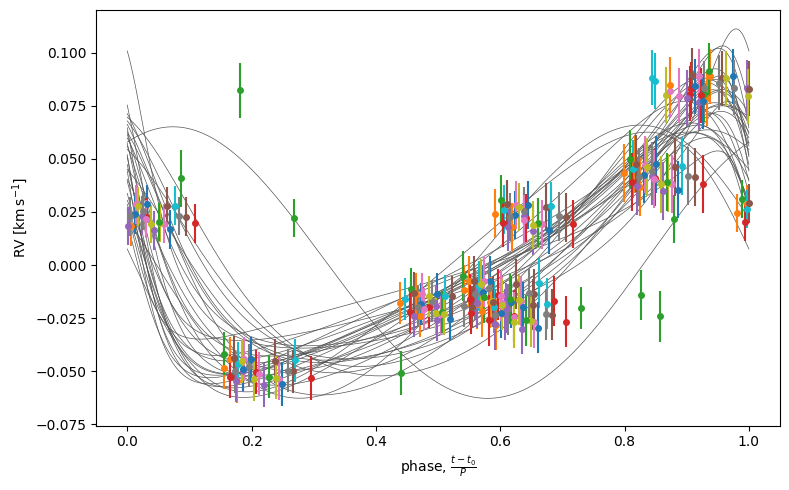

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
t_grid = np.linspace(59614, 59668, 1024)

for i in [0,1,3,4,5,6]:
    for j in np.arange(len(P_5[i])):
        _ = tj.plot_phase_fold(P_5[i][j],data=data,ax=ax)


(315.35, 315.9)

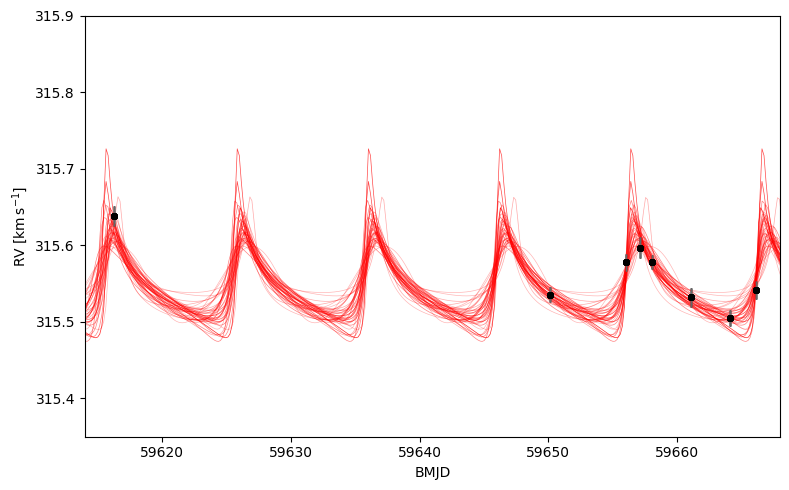

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
t_grid = np.linspace(59614, 59668, 1024)
#t_grid = np.linspace(59648, 59668, 1024)
for i in range(len(P_10)):
    _ = tj.plot_rv_curves(P_10[i],data=data,plot_kwargs=dict(color=colores[1]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax)

ax.set_xlim(59614, 59668)
ax.set_ylim(315.35,315.9)

(315.35, 315.9)

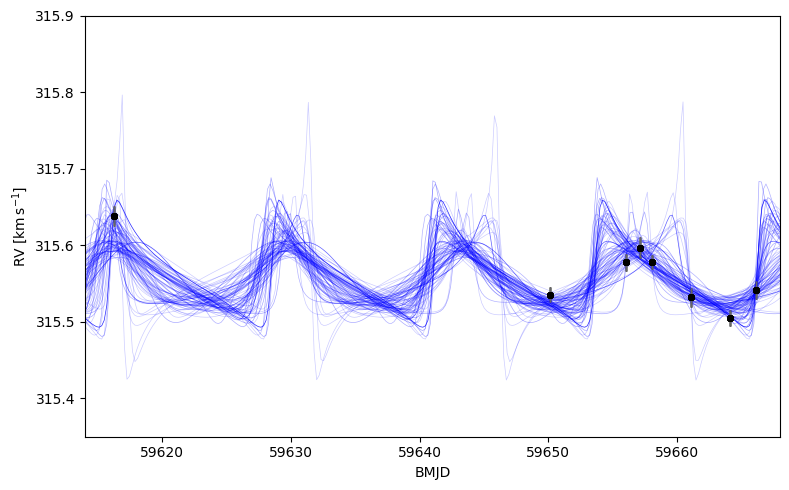

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
t_grid = np.linspace(59614, 59668, 1024)
#t_grid = np.linspace(59648, 59668, 1024)
for i in range(len(P_13)):
    _ = tj.plot_rv_curves(P_13[i],data=data,plot_kwargs=dict(color=colores[2]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax)

ax.set_xlim(59614, 59668)
ax.set_ylim(315.35,315.9)

(315.35, 315.9)

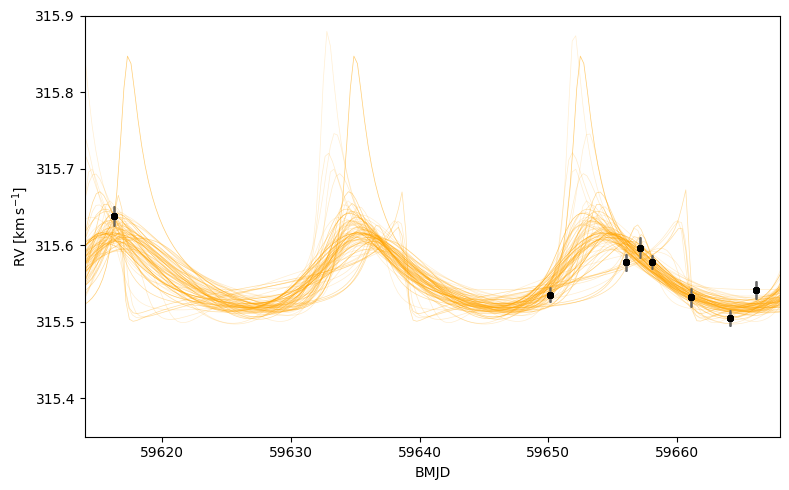

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
t_grid = np.linspace(59614, 59668, 1024)
#t_grid = np.linspace(59648, 59668, 1024)
for i in range(len(P_20)):
    _ = tj.plot_rv_curves(P_20[i],data=data,plot_kwargs=dict(color=colores[3]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax)

ax.set_xlim(59614, 59668)
ax.set_ylim(315.35,315.9)

(315.35, 315.9)

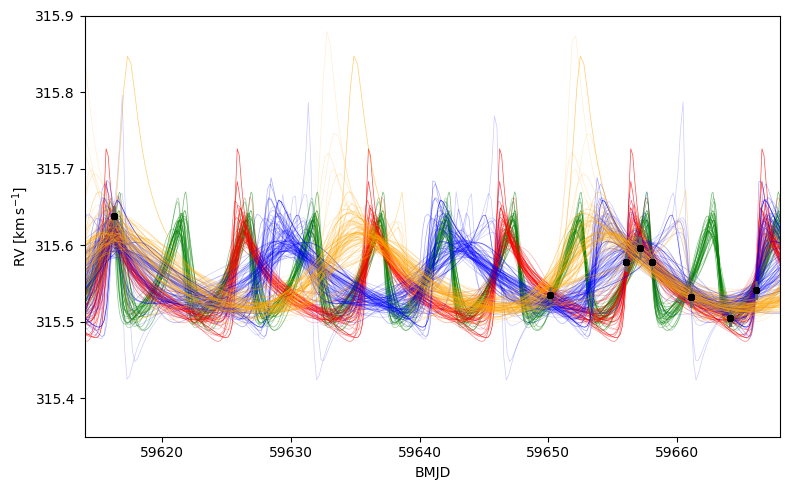

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")

for i in [0,1,3,4,5,6]:
    _ = tj.plot_rv_curves(P_5[i],data=data,plot_kwargs=dict(color=colores[0]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax)

for i in range(len(P_10)):
   _ = tj.plot_rv_curves(P_10[i],data=data,plot_kwargs=dict(color=colores[1]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax)

for i in range(len(P_13)):
    _ = tj.plot_rv_curves(P_13[i],data=data,plot_kwargs=dict(color=colores[2]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax)

for i in range(len(P_20)):
    _ = tj.plot_rv_curves(P_20[i],data=data,plot_kwargs=dict(color=colores[3]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax)

ax.set_xlim(59614, 59668)
ax.set_ylim(315.35,315.9)

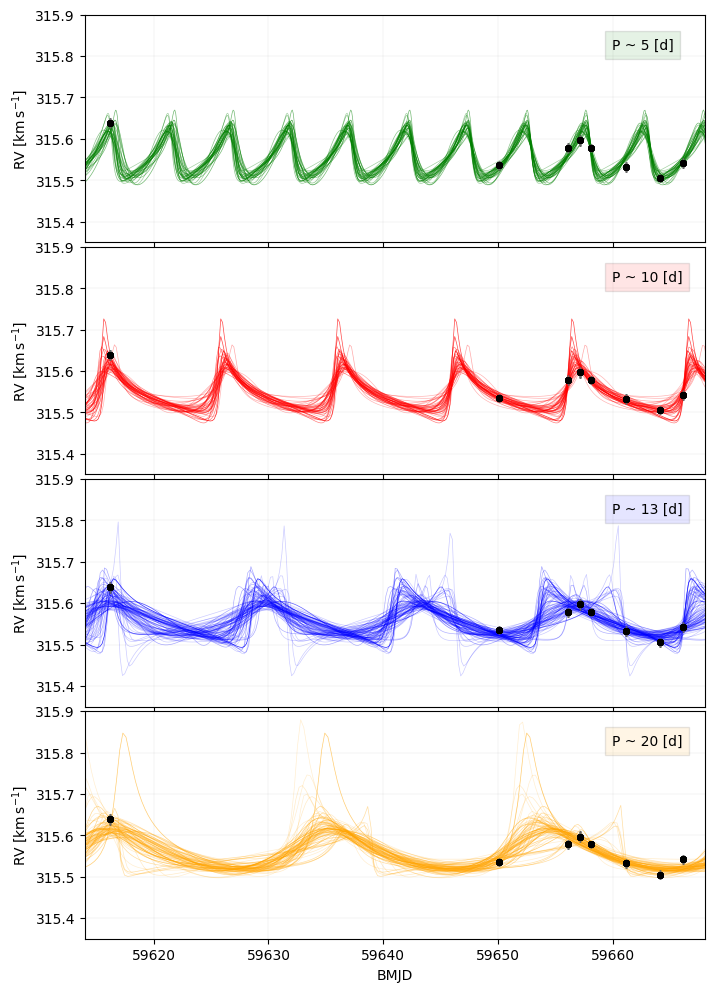

In [21]:
fig = plt.figure(figsize=(8,12))
gs = fig.add_gridspec(4, 1, hspace=0.02, wspace=0.05)
(ax1),(ax2),(ax3),(ax4) = gs.subplots(sharex=True)

for i in [0,1,3,4,5,6]:
    _ = tj.plot_rv_curves(P_5[i],data=data,plot_kwargs=dict(color=colores[0]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax1)

for i in range(len(P_10)):
   _ = tj.plot_rv_curves(P_10[i],data=data,plot_kwargs=dict(color=colores[1]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax2)

for i in range(len(P_13)):
    _ = tj.plot_rv_curves(P_13[i],data=data,plot_kwargs=dict(color=colores[2]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax3)

for i in range(len(P_20)):
    _ = tj.plot_rv_curves(P_20[i],data=data,plot_kwargs=dict(color=colores[3]),data_plot_kwargs=dict(color="k"),relative_to_t_ref=False,ax=ax4)

plt.text(0.85, 0.85, 'P ~ 5 [d]', transform = ax1.transAxes,bbox = {'facecolor': colores[0], 'alpha': 0.1, 'pad': 5})
plt.text(0.85, 0.85, 'P ~ 10 [d]', transform = ax2.transAxes,bbox = {'facecolor': colores[1], 'alpha': 0.1, 'pad': 5})
plt.text(0.85, 0.85, 'P ~ 13 [d]', transform = ax3.transAxes,bbox = {'facecolor': colores[2], 'alpha': 0.1, 'pad': 5})
plt.text(0.85, 0.85, 'P ~ 20 [d]', transform = ax4.transAxes,bbox = {'facecolor': colores[3], 'alpha': 0.1, 'pad': 5})

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(59614, 59668)
    ax.set_ylim(315.35,315.9)
    ax.grid(linestyle='-', linewidth=0.1)

In [22]:
suma5 = 0
for i in [0,1,3,4,5,6]:
    suma5 += len(P_5[i]["P"])
suma5

29

In [23]:
suma10 = 0
for i in range(len(P_10)):
    suma10 += len(P_10[i]["P"])
suma10

41

In [24]:
suma13 = 0
for i in range(len(P_13)):
    suma13 += len(P_13[i]["P"])
suma13

82

In [25]:
suma20 = 0
for i in range(len(P_20)):
    suma20 += len(P_20[i]["P"])
suma20

78

In [38]:
P5_all = []
e5_all = []
K5_all = []

for i in [0,1,3,4,5,6]:
    P5 = (P_5[i]["P"])
    P5_all = np.concatenate((P5, P5_all))
    e5 = (P_5[i]["e"])
    e5_all = np.concatenate((e5, e5_all))
    K5 = (P_5[i]["K"])
    K5_all = np.concatenate((K5, K5_all))
np.mean(P5_all),np.mean(e5_all),np.mean(K5_all)

(<Quantity 5.15962292 d>, <Quantity 0.38125685>, <Quantity 0.06361765 km / s>)

In [40]:
P10_all = []
e10_all = []
K10_all = []

for i in range(len(P_10)):
    P10 = (P_10[i]["P"])
    P10_all = np.concatenate((P10, P10_all))
    e10 = (P_10[i]["e"])
    e10_all = np.concatenate((e10, e10_all))
    K10 = (P_10[i]["K"])
    K10_all = np.concatenate((K10, K10_all))
np.mean(P10_all),np.mean(e10_all),np.mean(K10_all)

(<Quantity 10.19838206 d>, <Quantity 0.51592065>, <Quantity 0.06127843 km / s>)

In [41]:
P13_all = []
e13_all = []
K13_all = []

for i in range(len(P_13)):
    P13 = (P_13[i]["P"])
    P13_all = np.concatenate((P13, P13_all))
    e13 = (P_13[i]["e"])
    e13_all = np.concatenate((e13, e13_all))
    K13 = (P_13[i]["K"])
    K13_all = np.concatenate((K13, K13_all))
np.mean(P13_all),np.mean(e13_all),np.mean(K13_all)

(<Quantity 13.36719928 d>, <Quantity 0.44554206>, <Quantity 0.05555499 km / s>)

In [43]:
P20_all = []
e20_all = []
K20_all = []
for i in range(len(P_20)):
    P20 = (P_20[i]["P"])
    P20_all = np.concatenate((P20, P20_all))
    e20 = (P_20[i]["e"])
    e20_all = np.concatenate((e20, e20_all))
    K20 = (P_20[i]["K"])
    K20_all = np.concatenate((K20, K20_all))
np.mean(P20_all),np.mean(e20_all),np.mean(K20_all)

(<Quantity 19.19068154 d>, <Quantity 0.3584781>, <Quantity 0.05892188 km / s>)

In [45]:
P = np.mean(P5_all)#0.866605*u.d
e = np.mean(e5_all)
K = np.mean(K5_all).to("m/s")
G = 6.67430e-11*(u.m)**3*1/u.kg * 1/u.s**2

In [50]:
def f(P,e,K):
    G = 6.67430e-11*(u.m)**3*1/u.kg * 1/u.s**2
    f = (P*K**3*(1-e**2)**(3/2))/(2*np.pi*G)
    f = f.cgs
    f = (f/(1.989e+33*u.g)*u.M_sun)
    return f
f_value = f(P,e,K)
f_value

<Quantity 1.0872299e-10 solMass>

In [51]:
M1 = 0.8*u.M_sun
sini =  1

In [52]:
# Ejemplo de uso
def resolver_ecuacion_cubica(a, b, c, d):
    coeficientes = [a, b, c, d]
    raices = np.roots(coeficientes)
    return raices
    
a = (sini)**3
b = -f_value.value
c = -2*M1.value*f_value.value
d = -M1.value**2*f_value.value

raices = resolver_ecuacion_cubica(a, b, c, d)
print("Las raíces de la ecuación son:", raices)

Las raíces de la ecuación son: [ 0.00041145+0.j         -0.00020572+0.00035608j -0.00020572-0.00035608j]


In [53]:
M2 = raices[0].real*u.M_sun
M_jupiter = 1.898e27*u.kg
print("La masa del objeto en M_Sun, M2 = ",M2)
print("La masa del objeto en kg, M2 = ",M2.to("kg"))
print("La masa del objeto en M_J, M2 = ",M2.to("M_jup"))
print("La masa del objeto en M_J, M2 = ",M2.to("M_earth"))

La masa del objeto en M_Sun, M2 =  0.00041144898041765615 solMass
La masa del objeto en kg, M2 =  8.181292139511166e+26 kg
La masa del objeto en M_J, M2 =  0.43101976292775057 jupiterMass
La masa del objeto en M_J, M2 =  136.99032446214147 earthMass


In [54]:
P = np.mean(P10_all)#0.866605*u.d
e = np.mean(e10_all)
K = np.mean(K10_all).to("m/s")
G = 6.67430e-11*(u.m)**3*1/u.kg * 1/u.s**2

f_value = f(P,e,K)
f_value

M1 = 0.8*u.M_sun
sini =  1

a = (sini)**3
b = -f_value.value
c = -2*M1.value*f_value.value
d = -M1.value**2*f_value.value

raices = resolver_ecuacion_cubica(a, b, c, d)
print("Las raíces de la ecuación son:", raices)

M2 = raices[0].real*u.M_sun
M_jupiter = 1.898e27*u.kg
print("La masa del objeto en M_Sun, M2 = ",M2)
print("La masa del objeto en kg, M2 = ",M2.to("kg"))
print("La masa del objeto en M_J, M2 = ",M2.to("M_jup"))
print("La masa del objeto en M_J, M2 = ",M2.to("M_earth"))

Las raíces de la ecuación son: [ 0.0004609 +0.j         -0.00023045+0.00039884j -0.00023045-0.00039884j]
La masa del objeto en M_Sun, M2 =  0.00046089897168192216 solMass
La masa del objeto en kg, M2 =  9.164560646869155e+26 kg
La masa del objeto en M_J, M2 =  0.4828218684764575 jupiterMass
La masa del objeto en M_J, M2 =  153.45450512693614 earthMass


In [55]:
P = np.mean(P13_all)#0.866605*u.d
e = np.mean(e13_all)
K = np.mean(K13_all).to("m/s")
G = 6.67430e-11*(u.m)**3*1/u.kg * 1/u.s**2

f_value = f(P,e,K)
f_value

M1 = 0.8*u.M_sun
sini =  1

a = (sini)**3
b = -f_value.value
c = -2*M1.value*f_value.value
d = -M1.value**2*f_value.value

raices = resolver_ecuacion_cubica(a, b, c, d)
print("Las raíces de la ecuación son:", raices)

M2 = raices[0].real*u.M_sun
M_jupiter = 1.898e27*u.kg
print("La masa del objeto en M_Sun, M2 = ",M2)
print("La masa del objeto en kg, M2 = ",M2.to("kg"))
print("La masa del objeto en M_J, M2 = ",M2.to("M_jup"))
print("La masa del objeto en M_J, M2 = ",M2.to("M_earth"))

Las raíces de la ecuación son: [ 0.00047791+0.j         -0.00023896+0.00041356j -0.00023896-0.00041356j]
La masa del objeto en M_Sun, M2 =  0.00047791457684330394 solMass
La masa del objeto en kg, M2 =  9.502900619457078e+26 kg
La masa del objeto en M_J, M2 =  0.5006468296545998 jupiterMass
La masa del objeto en M_J, M2 =  159.11978413579706 earthMass


In [56]:
P = np.mean(P20_all)#0.866605*u.d
e = np.mean(e20_all)
K = np.mean(K20_all).to("m/s")
G = 6.67430e-11*(u.m)**3*1/u.kg * 1/u.s**2

f_value = f(P,e,K)
f_value

M1 = 0.8*u.M_sun
sini =  1

a = (sini)**3
b = -f_value.value
c = -2*M1.value*f_value.value
d = -M1.value**2*f_value.value

raices = resolver_ecuacion_cubica(a, b, c, d)
print("Las raíces de la ecuación son:", raices)

M2 = raices[0].real*u.M_sun
M_jupiter = 1.898e27*u.kg
print("La masa del objeto en M_Sun, M2 = ",M2)
print("La masa del objeto en kg, M2 = ",M2.to("kg"))
print("La masa del objeto en M_J, M2 = ",M2.to("M_jup"))
print("La masa del objeto en M_J, M2 = ",M2.to("M_earth"))

Las raíces de la ecuación son: [ 0.00059632+0.j         -0.00029816+0.00051591j -0.00029816-0.00051591j]
La masa del objeto en M_Sun, M2 =  0.0005963194033078499 solMass
La masa del objeto en kg, M2 =  1.1857273876261007e+27 kg
La masa del objeto en M_J, M2 =  0.6246836426282164 jupiterMass
La masa del objeto en M_J, M2 =  198.5422067622833 earthMass
